In [14]:
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine
from MyCreds.mycreds import Capstone_AWS_PG
import numpy as np
import shapely
from geoalchemy2 import Geometry

In [99]:
# engine = create_engine(f'postgresql+psycopg2://{Capstone_AWS_PG.username}:{Capstone_AWS_PG.password}@{Capstone_AWS_PG.host}/capstone', echo=False)
#
# sql_alc_cnxn = engine.connect()
#
# sql_query = 'select * from preschools;'
#
# df = gpd.read_postgis(sql_query, sql_alc_cnxn, geom_col='geometry')
# df

,Name,Description,geometry
0,kml_1,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.70086 1.33832 0.00000)
1,kml_2,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.89866 1.39044 0.00000)
2,kml_3,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.80681 1.43802 0.00000)
3,kml_4,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.78742 1.43344 0.00000)
4,kml_5,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.88863 1.39565 0.00000)
...,...,...,...
1920,kml_1921,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.95263 1.34910 0.00000)
1921,kml_1922,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.77738 1.44503 0.00000)
1922,kml_1923,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.84084 1.31410 0.00000)
1923,kml_1924,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.82625 1.35732 0.00000)


In [3]:
import geopandas as gpd
# df = gpd.read_file('../data/pre-schools-location/pre-schools-location-geojson.geojson')
df = gpd.read_file('../data/pre-schools-location/pre-schools-location-geojson.geojson')
df

,Name,Description,geometry
0,kml_1,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.70086 1.33832 0.00000)
1,kml_2,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.89866 1.39044 0.00000)
2,kml_3,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.80681 1.43802 0.00000)
3,kml_4,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.78742 1.43344 0.00000)
4,kml_5,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.88863 1.39565 0.00000)
...,...,...,...
1920,kml_1921,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.95263 1.34910 0.00000)
1921,kml_1922,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.77738 1.44503 0.00000)
1922,kml_1923,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.84084 1.31410 0.00000)
1923,kml_1924,<center><table><tr><th colspan='2' align='cent...,POINT Z (103.82625 1.35732 0.00000)


In [4]:
df.dtypes

Name             object
Description      object
geometry       geometry
dtype: object

In [4]:
des = df['Description']
des

0       <center><table><tr><th colspan='2' align='cent...
1       <center><table><tr><th colspan='2' align='cent...
2       <center><table><tr><th colspan='2' align='cent...
3       <center><table><tr><th colspan='2' align='cent...
4       <center><table><tr><th colspan='2' align='cent...
                              ...                        
1920    <center><table><tr><th colspan='2' align='cent...
1921    <center><table><tr><th colspan='2' align='cent...
1922    <center><table><tr><th colspan='2' align='cent...
1923    <center><table><tr><th colspan='2' align='cent...
1924    <center><table><tr><th colspan='2' align='cent...
Name: Description, Length: 1925, dtype: object

In [5]:
from bs4 import BeautifulSoup
import re
from collections import defaultdict

In [6]:
centers_dict = defaultdict(dict)

for i, description in enumerate(des):
    soup = BeautifulSoup(des[i])
    table = soup.find_all('tr')[1:]

    centers_dict[i] = {re.findall('<th>(\w+)<\/th>\s<td>(.+)?<\/td>', str(row))[0][0]:
                             re.findall('<th>(\w+)<\/th>\s<td>(.+)?<\/td>', str(row))[0][1] for row in table}



In [7]:
preschool_descriptions = pd.DataFrame(centers_dict).T
preschool_descriptions

,CENTRE_NAME,CENTRE_CODE,ADDRESS,POSTAL_CODE,INC_CRC,FMEL_UPD_D
0,BRILLIANT TOTS PTE. LTD.,PT9334,"610, JURONG WEST STREET 65, #01 - 534, S 640610",640610,0523C7904478A63D,20200812235534
1,BUBBLESLAND PLAYHOUSE PTE LTD,PT7680,"238, COMPASSVALE WALK, #01 - 542, S 540238",540238,18BED05A501AA168,20200812235534
2,BUCKET HOUSE PRESCHOOL,PT9527,"39, WOODLANDS CLOSE, #01 - 62, MEGA@WOODLANDS,...",737856,C88B9AC31EE71BF6,20200812235534
3,BUMBLE BEE CHILD CARE CENTRE,PT3150,"369, WOODLANDS AVENUE 1, #01 - 853, S 730369",730369,64AB8FACA8F60129,20200812235534
4,BUSY BEES SINGAPORE PTE LTD,PT9117,"327B, ANCHORVALE ROAD, #01 - 322, S 542327",542327,E1B55AC65B9059E8,20200812235534
...,...,...,...,...,...,...
1920,PCF Sparkletots Preschool @ Tampines-Changkat ...,ST0261,"284 Tampines Street 22 Blk 285 #01-149 , S520284",520284,7CFD747E120FA0D5,20200812235535
1921,New Life Kindergarten,RC1838,"10 Marsiling Lane , S739147",739147,002D449DA41EB2ED,20200812235535
1922,Newton Kindergarten,RC1798,"16 Newton Road , S307995",307995,C4489713904CDA34,20200812235535
1923,P &amp; J Kindergarten,PT9661,"35 Windsor Park Road, Windsor Park , S574141",574141,50EBBF878EBACFB7,20200812235535


In [8]:
df = df.merge(preschool_descriptions, left_index=True, right_index=True)
df = df[['CENTRE_NAME', 'CENTRE_CODE', 'ADDRESS', 'POSTAL_CODE', 'INC_CRC', 'FMEL_UPD_D', 'geometry']]
df.columns = [col.lower() for col in df.columns]
df

,centre_name,centre_code,address,postal_code,inc_crc,fmel_upd_d,geometry
0,BRILLIANT TOTS PTE. LTD.,PT9334,"610, JURONG WEST STREET 65, #01 - 534, S 640610",640610,0523C7904478A63D,20200812235534,POINT Z (103.70086 1.33832 0.00000)
1,BUBBLESLAND PLAYHOUSE PTE LTD,PT7680,"238, COMPASSVALE WALK, #01 - 542, S 540238",540238,18BED05A501AA168,20200812235534,POINT Z (103.89866 1.39044 0.00000)
2,BUCKET HOUSE PRESCHOOL,PT9527,"39, WOODLANDS CLOSE, #01 - 62, MEGA@WOODLANDS,...",737856,C88B9AC31EE71BF6,20200812235534,POINT Z (103.80681 1.43802 0.00000)
3,BUMBLE BEE CHILD CARE CENTRE,PT3150,"369, WOODLANDS AVENUE 1, #01 - 853, S 730369",730369,64AB8FACA8F60129,20200812235534,POINT Z (103.78742 1.43344 0.00000)
4,BUSY BEES SINGAPORE PTE LTD,PT9117,"327B, ANCHORVALE ROAD, #01 - 322, S 542327",542327,E1B55AC65B9059E8,20200812235534,POINT Z (103.88863 1.39565 0.00000)
...,...,...,...,...,...,...,...
1920,PCF Sparkletots Preschool @ Tampines-Changkat ...,ST0261,"284 Tampines Street 22 Blk 285 #01-149 , S520284",520284,7CFD747E120FA0D5,20200812235535,POINT Z (103.95263 1.34910 0.00000)
1921,New Life Kindergarten,RC1838,"10 Marsiling Lane , S739147",739147,002D449DA41EB2ED,20200812235535,POINT Z (103.77738 1.44503 0.00000)
1922,Newton Kindergarten,RC1798,"16 Newton Road , S307995",307995,C4489713904CDA34,20200812235535,POINT Z (103.84084 1.31410 0.00000)
1923,P &amp; J Kindergarten,PT9661,"35 Windsor Park Road, Windsor Park , S574141",574141,50EBBF878EBACFB7,20200812235535,POINT Z (103.82625 1.35732 0.00000)


<AxesSubplot:>

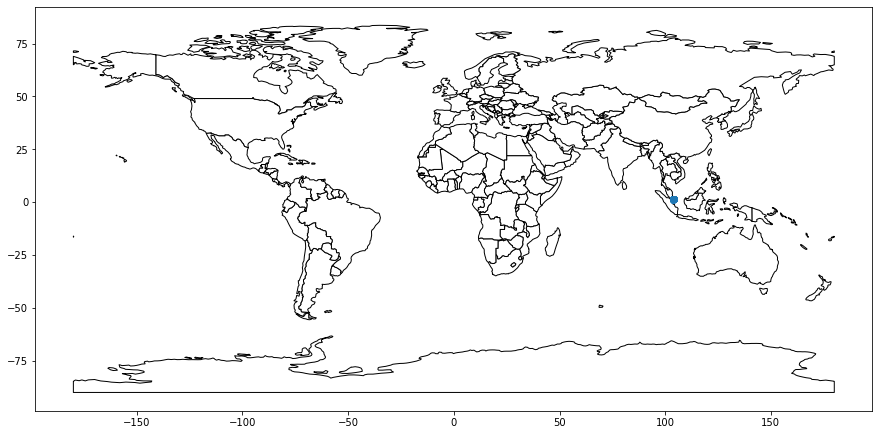

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black', figsize=(15, 10))
df.plot(ax=base)

In [16]:
# world[world['name'] == 'Singapore']
sorted(world['name'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [12]:
df['geometry'] = df['geometry'].map(lambda point: shapely.ops.transform(lambda x, y, z: (y, x), point))
df

,centre_name,centre_code,address,postal_code,inc_crc,fmel_upd_d,geometry
0,BRILLIANT TOTS PTE. LTD.,PT9334,"610, JURONG WEST STREET 65, #01 - 534, S 640610",640610,0523C7904478A63D,20200812235534,POINT (1.33832 103.70086)
1,BUBBLESLAND PLAYHOUSE PTE LTD,PT7680,"238, COMPASSVALE WALK, #01 - 542, S 540238",540238,18BED05A501AA168,20200812235534,POINT (1.39044 103.89866)
2,BUCKET HOUSE PRESCHOOL,PT9527,"39, WOODLANDS CLOSE, #01 - 62, MEGA@WOODLANDS,...",737856,C88B9AC31EE71BF6,20200812235534,POINT (1.43802 103.80681)
3,BUMBLE BEE CHILD CARE CENTRE,PT3150,"369, WOODLANDS AVENUE 1, #01 - 853, S 730369",730369,64AB8FACA8F60129,20200812235534,POINT (1.43344 103.78742)
4,BUSY BEES SINGAPORE PTE LTD,PT9117,"327B, ANCHORVALE ROAD, #01 - 322, S 542327",542327,E1B55AC65B9059E8,20200812235534,POINT (1.39565 103.88863)
...,...,...,...,...,...,...,...
1920,PCF Sparkletots Preschool @ Tampines-Changkat ...,ST0261,"284 Tampines Street 22 Blk 285 #01-149 , S520284",520284,7CFD747E120FA0D5,20200812235535,POINT (1.34910 103.95263)
1921,New Life Kindergarten,RC1838,"10 Marsiling Lane , S739147",739147,002D449DA41EB2ED,20200812235535,POINT (1.44503 103.77738)
1922,Newton Kindergarten,RC1798,"16 Newton Road , S307995",307995,C4489713904CDA34,20200812235535,POINT (1.31410 103.84084)
1923,P &amp; J Kindergarten,PT9661,"35 Windsor Park Road, Windsor Park , S574141",574141,50EBBF878EBACFB7,20200812235535,POINT (1.35732 103.82625)


In [13]:
df = df.to_crs(4326)

In [15]:
engine = create_engine(f'postgresql+psycopg2://{Capstone_AWS_PG.username}:{Capstone_AWS_PG.password}@{Capstone_AWS_PG.host}/capstone', echo=False)

sql_alc_cnxn = engine.connect()

df.to_postgis('preschools', sql_alc_cnxn, if_exists='replace', index=False, dtype={'geometry': Geometry(geometry_type='POINT', srid=4326)})

sql_alc_cnxn.close()